In [7]:
import rasterio
from rasterio.plot import show

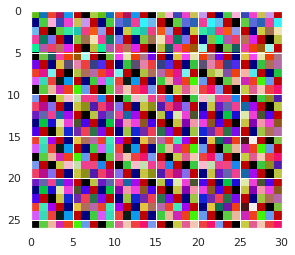

<AxesSubplot:>

In [8]:
fp = r'Data/Images Satellitaires/ID6/image_20160614.tif'
img = rasterio.open(fp)
show(img)

In [124]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for the yeo-johnson transformation
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (15,13)
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [125]:
# load dataset
info = pd.read_csv('Data/infos.csv')

# rows and columns of the data
print(info.shape)

# visualise the dataset
info.head()

(480, 8)


,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6
0,15/16,ID0,categorie1,categorie0,2.771754,7.188299,4.97,1.77
1,15/16,ID1,categorie1,categorie0,2.771754,7.146000,4.97,1.77
2,15/16,ID2,categorie1,categorie0,2.771754,7.137559,1.77,4.97
3,15/16,ID3,categorie1,categorie0,2.771754,7.120694,4.97,1.77
4,15/16,ID4,NaN,categorie0,2.771754,6.995000,4.97,1.77


In [111]:
# load dataset
rendement = pd.read_csv('Data/rendement.csv')

# rows and columns of the data
print(rendement.shape)

# visualise the dataset
rendement.head()

(480, 3)


,ID_Terre,An,Output
0,ID0,15/16,3.248868
1,ID1,15/16,3.194677
2,ID2,15/16,3.556090
3,ID3,15/16,3.513139
4,ID4,15/16,3.351073


In [112]:
a = rendement.ID_Terre == info.ID

In [113]:
b = rendement.An == info.Annee

In [114]:
sum(a)

480

In [115]:
data = pd.concat([info,rendement],axis=1)

In [116]:
data.drop(['ID_Terre','An'],axis=1,inplace=True)

In [117]:
data

,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6,Output
0,15/16,ID0,categorie1,categorie0,2.771754,7.188299,4.97,1.77,3.248868
1,15/16,ID1,categorie1,categorie0,2.771754,7.146000,4.97,1.77,3.194677
2,15/16,ID2,categorie1,categorie0,2.771754,7.137559,1.77,4.97,3.556090
3,15/16,ID3,categorie1,categorie0,2.771754,7.120694,4.97,1.77,3.513139
4,15/16,ID4,NaN,categorie0,2.771754,6.995000,4.97,1.77,3.351073
...,...,...,...,...,...,...,...,...,...
475,21/22,ID68,categorie3,categorie0,1.970250,16.995000,4.97,NaN,inf
476,21/22,ID69,categorie3,categorie0,1.936440,16.995000,NaN,1.77,inf
477,21/22,ID70,categorie3,categorie0,1.903610,16.995000,4.97,1.77,inf
478,21/22,ID41,categorie0,categorie0,2.895684,19.595000,4.97,1.77,inf


In [118]:
data= data[data['Output']!= np.inf]


In [119]:
# shuffle the DataFrame rows
data = data.sample(frac = 1)
data.rename(columns = {'Output':'target'},inplace=True)

train = data.iloc[:int(data.shape[0]*0.9),:]
test = data.iloc[int(data.shape[0]*0.9):,:]

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 89 to 262
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Annee   370 non-null    object 
 1   ID      370 non-null    object 
 2   Var1    333 non-null    object 
 3   Var2    335 non-null    object 
 4   Var3    328 non-null    float64
 5   Var4    332 non-null    float64
 6   Var5    334 non-null    float64
 7   Var6    331 non-null    float64
 8   target  370 non-null    float64
dtypes: float64(5), object(4)
memory usage: 28.9+ KB


In [121]:
# let's now save the train and test sets

train.to_csv('ttrain.csv', index=False)
test.to_csv('ttest.csv', index=False)

## Target

In [122]:
import EDA as pp

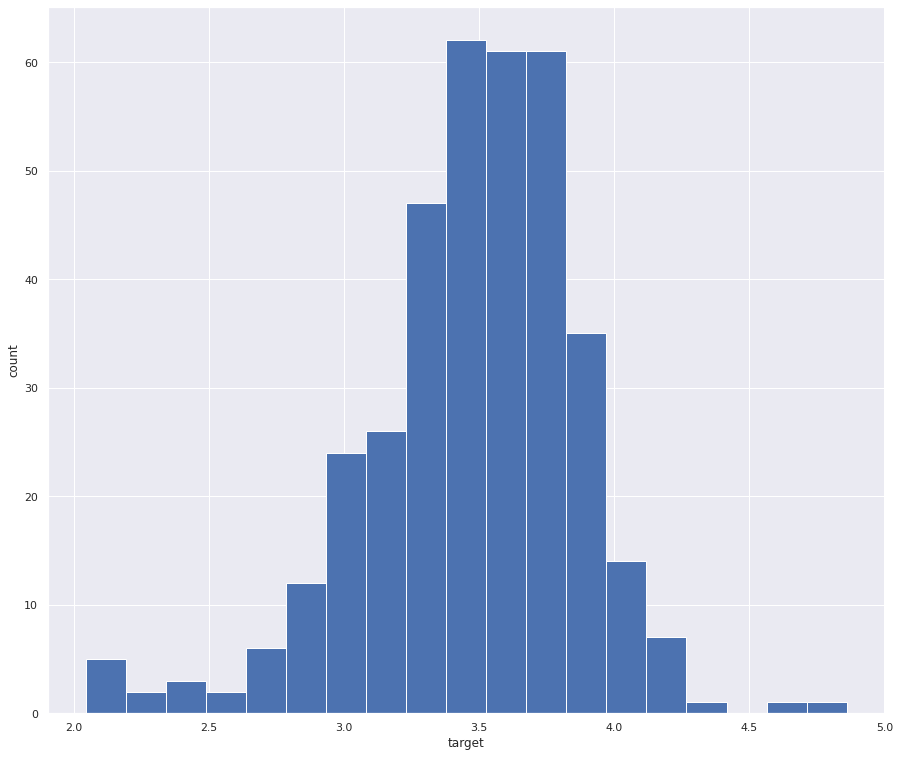

In [126]:
# histogran to evaluate target distribution
pp.plot_hist(train['target'],'target')

Good! Looks like a gaussian distribution

## Variable Types

Next, let's identify the categorical and numerical variables

In [127]:
cat_vars,num_vars = pp.extract_features_type(train)

In [128]:
num_vars.remove('target')

# Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [136]:
# make a list of the variables that contain missing values
vars_with_na = pp.get_missing_var(train)

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

train[vars_with_na].isnull().mean().sort_values(ascending=False)

Var3    0.113514
Var6    0.105405
Var4    0.102703
Var1    0.100000
Var5    0.097297
Var2    0.094595
dtype: float64

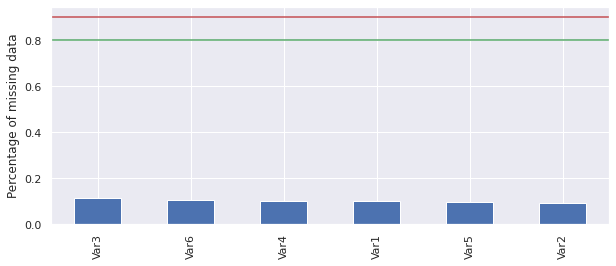

In [137]:
pp.plot_missign_percentage(train, vars_with_na)

Small number of missing variables, good but we need to imput them !

In [134]:
# now we can determine which variables, from those with missing data,
# are numerical and which are categorical

cat_na, num_na = pp.get_missing_var_type(train, cat_vars, num_vars, vars_with_na)

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  2
Number of numerical variables with na:  4


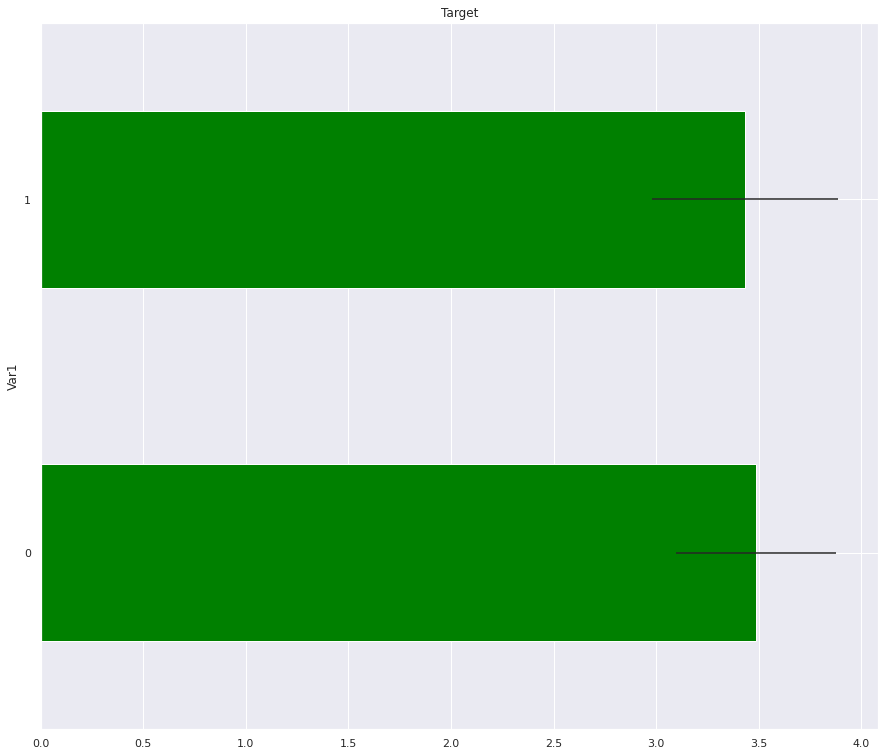

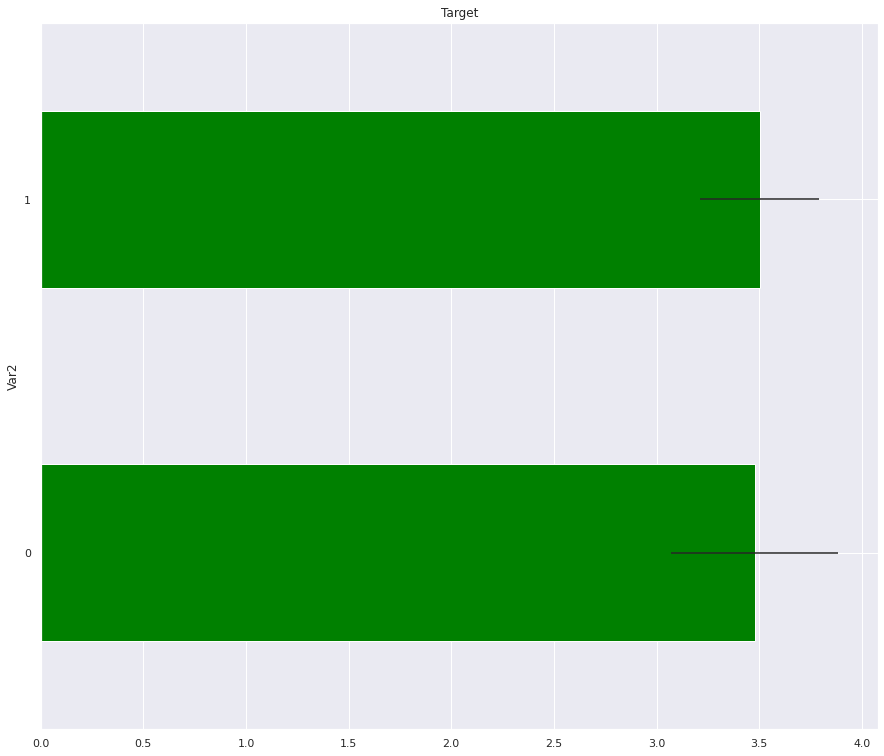

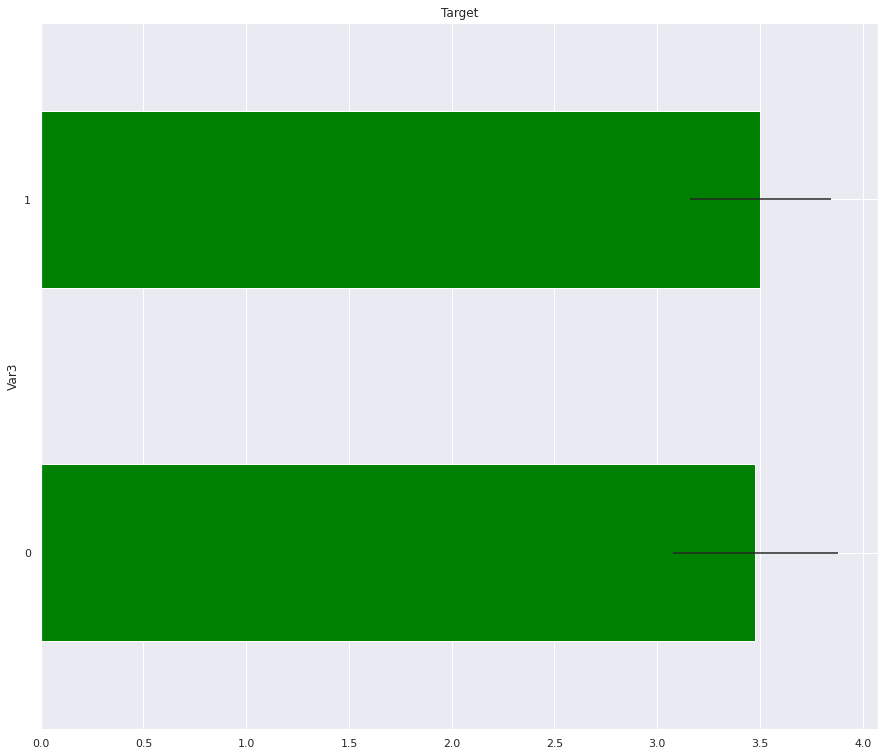

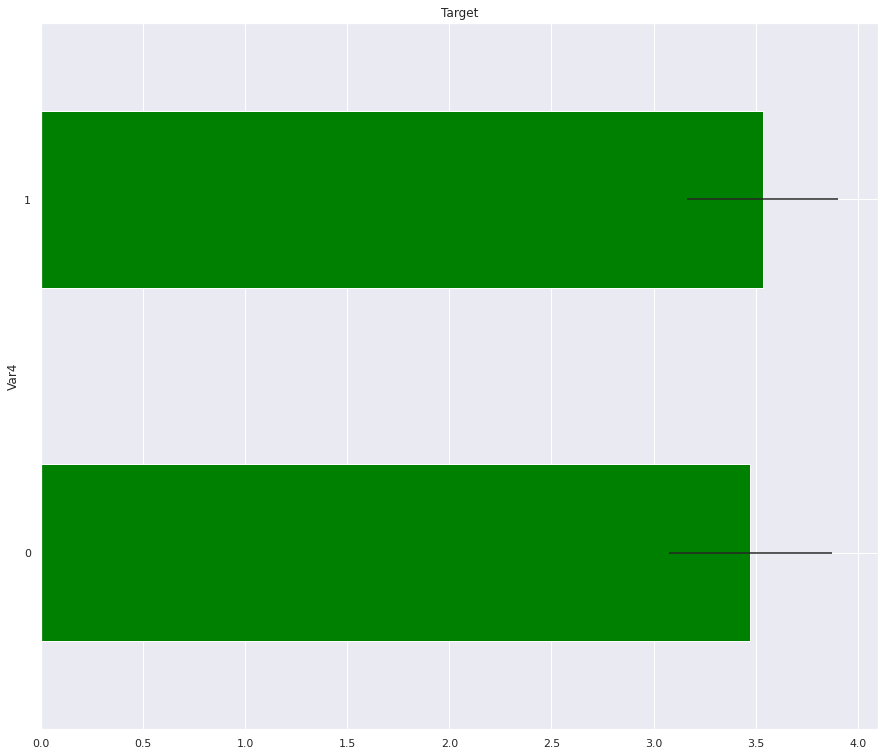

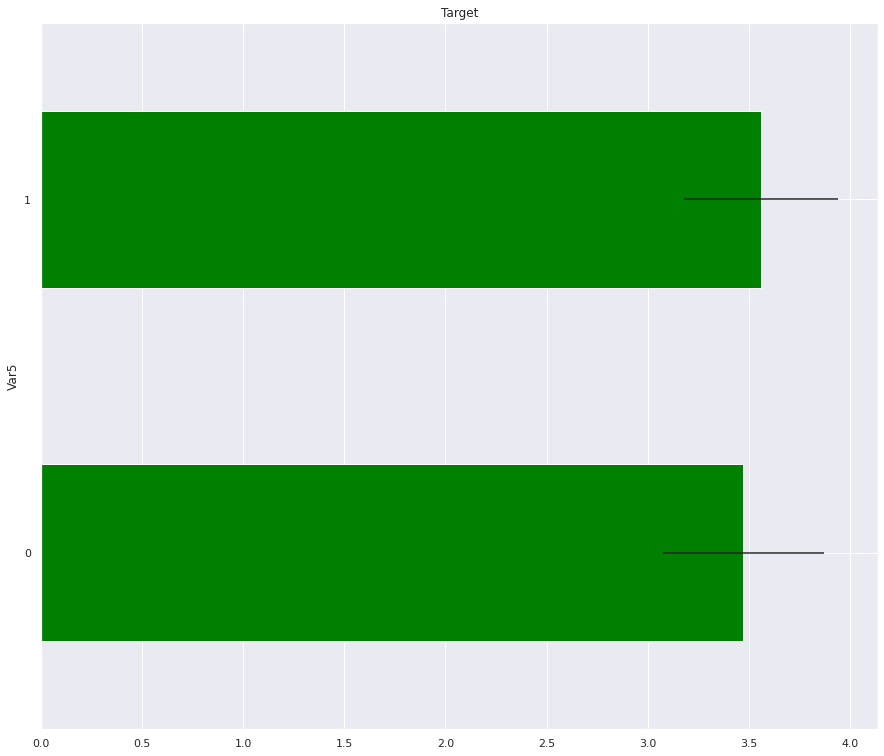

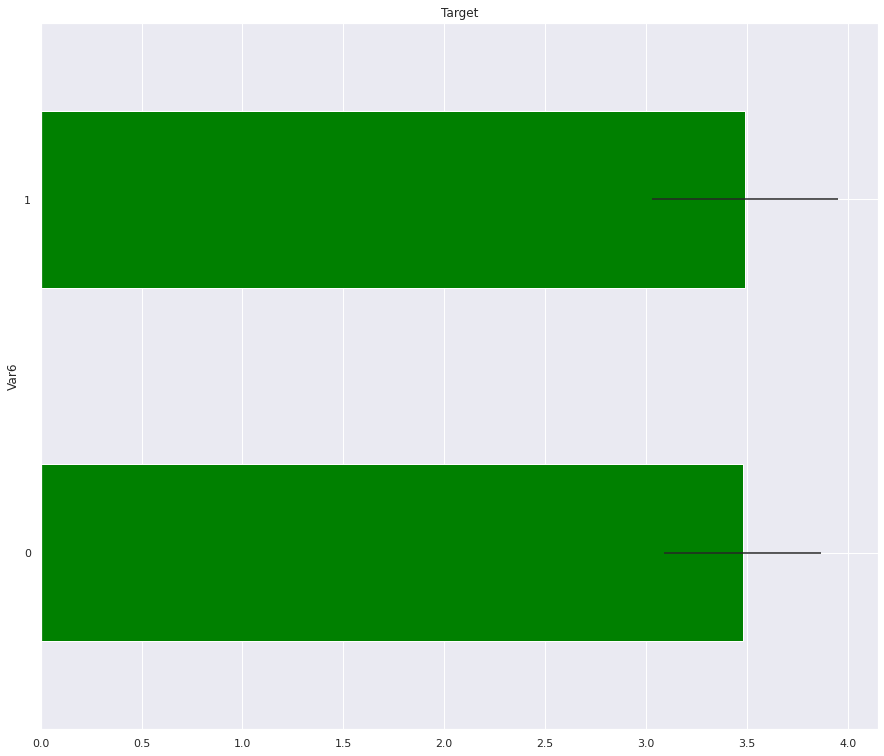

In [135]:
# Let's evaluate the target in those observations where the information is missing. We will do this for each variable that shows missing data.

for var in vars_with_na:
    pp.analyse_na_value(data, var)

the average Target where the information is missing, nearly the same average target where information exists. This suggests that data being missing does not impact our target

# Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [31]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
train[num_vars].head()

Number of numerical variables:  4


,Var3,Var4,Var5,Var6
4,2.771754,6.99500,4.97,1.77
206,1.903610,8.59500,4.97,1.77
381,2.771754,16.99500,4.97,1.77
366,1.472738,NaN,4.97,1.77
23,2.648778,5.56976,4.97,1.77


## Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [138]:
#  let's male a list of discrete variables
discrete_vars = pp.get_discrete_var(train,num_vars,[])

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [139]:
train[discrete_vars].head()

,Var5,Var6
89,4.97,1.770
123,NaN,1.595
117,4.97,1.770
374,4.97,1.770
193,4.97,1.770


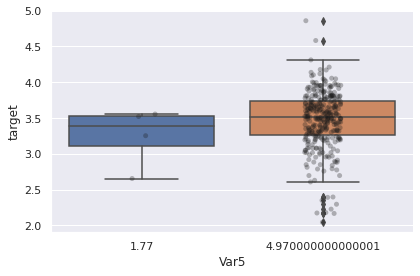

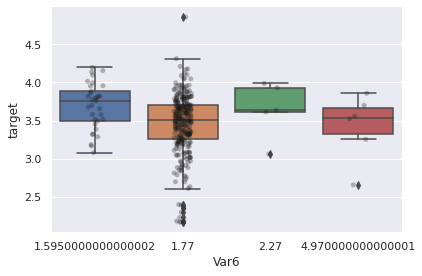

In [141]:
for var in discrete_vars:
    pp.box_plot(train, var)

For Var5, we see an increase in the Target for value 4.97. 
For Var6, we don't see this tendency. Most likely that variable is not a good predictor.

## Continuous variables

Let's  find the distribution of the continuous variables. We will consider continuous variables to all those that are not discrete.

In [142]:
# make list of continuous variables
cont_vars = pp.get_continous_var(train, num_vars, discrete_vars, [])

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  2


In [143]:
# let's visualise the continuous variables
data[cont_vars].head()

,Var3,Var4
89,1.613984,6.965871
123,1.926960,6.995000
117,2.771754,8.595000
374,2.771754,16.995000
193,1.566000,8.595000


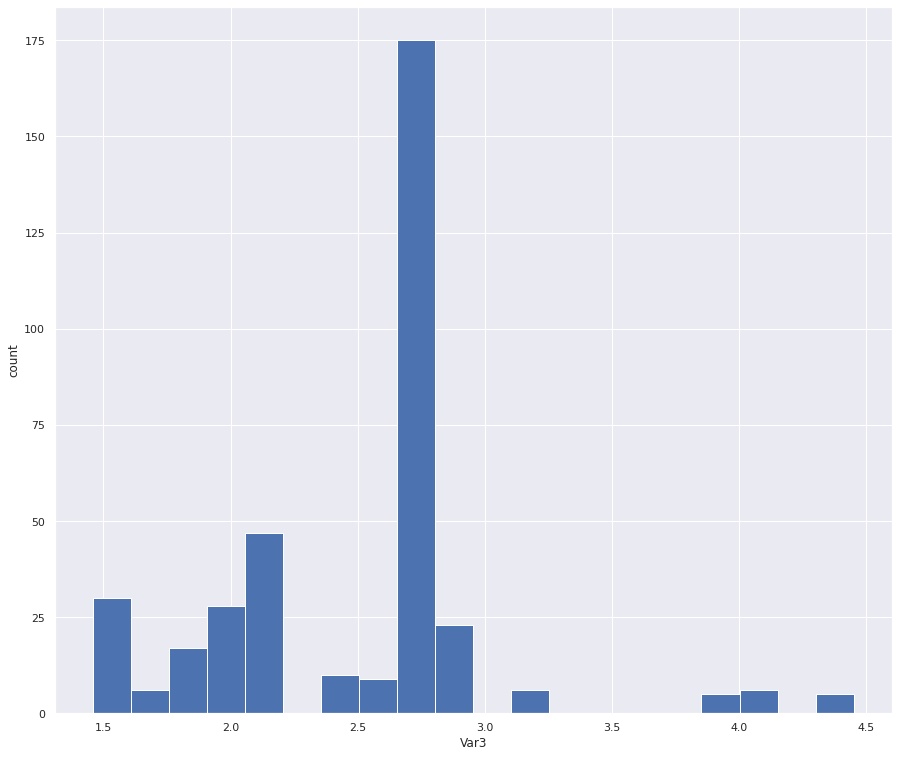

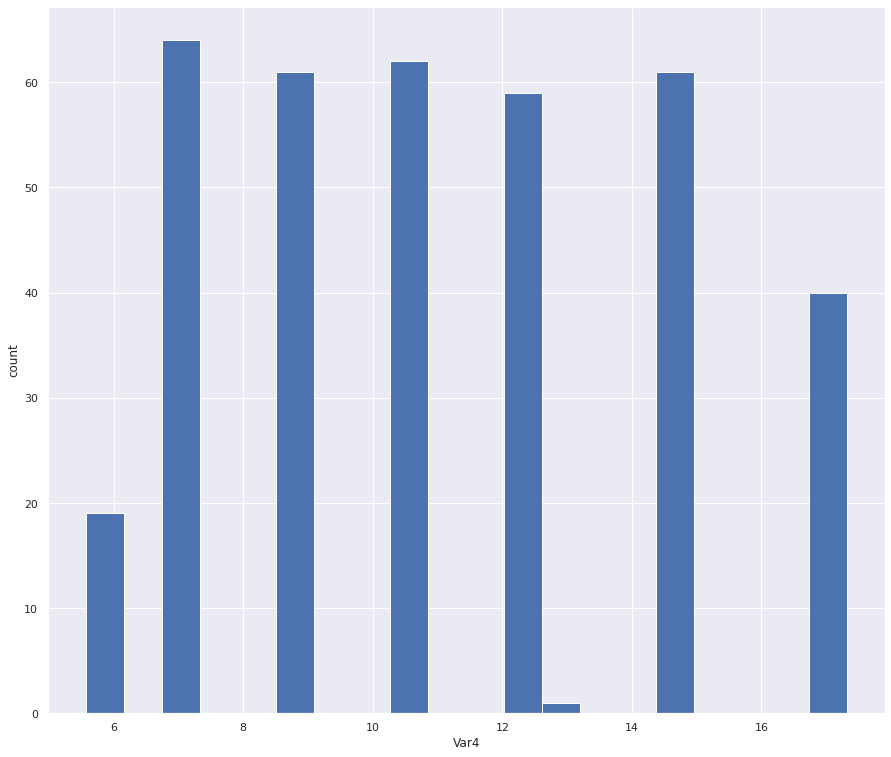

In [144]:
# lets plot histograms for all continuous variables
for var in cont_vars:
    pp.plot_hist(data[var],var)

Var3 looks more to left skewed distribution, we can binarize it, and for Var4 more like uniformaly distributed

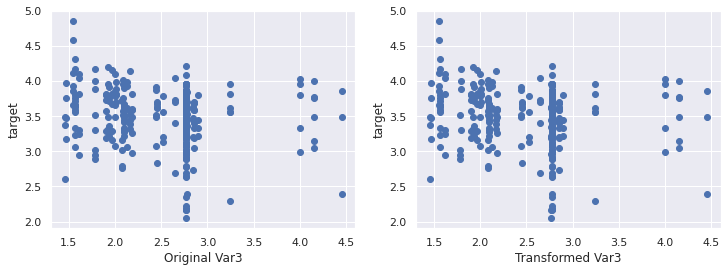

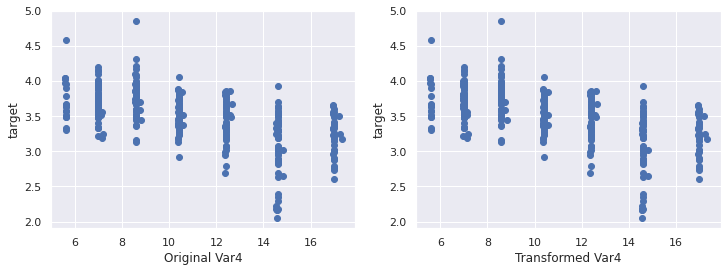

In [145]:
# let's plot the original variables

for var in cont_vars:
    pp.check_transformation(train,train,var,train['target'])

No clear correlation between Var3 and the target but if discretize Var4, we can see that as Var4 increase the mean of the target decrease

# Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [146]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  4


In [147]:
# let's visualise the values of the categorical variables
train[cat_vars].head()

,Annee,ID,Var1,Var2
89,16/17,ID20,categorie3,categorie0
123,16/17,ID56,categorie3,categorie0
117,16/17,ID50,categorie0,categorie0
374,20/21,ID29,categorie1,categorie0
193,17/18,ID57,categorie3,categorie0


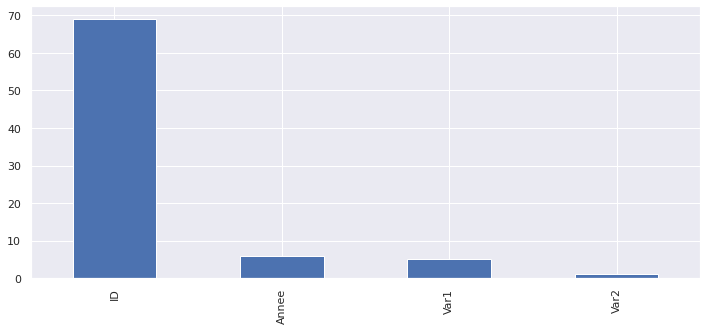

In [148]:
# we count unique categories with pandas unique() 
# and then plot them in descending order
pp.plot_cardinality(train, cat_vars)

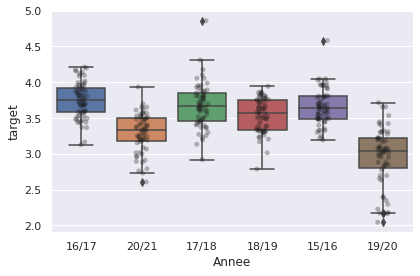

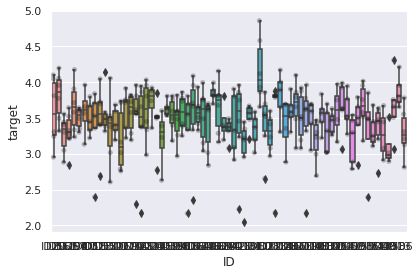

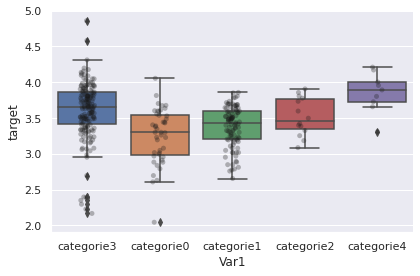

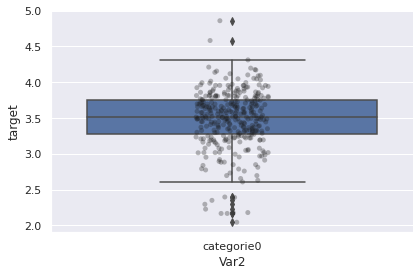

In [149]:
# now let's plot the house mean sale price based on the quality of the 
# various attributes

for var in cat_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='target', data=train, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='target', data=train, jitter=0.1, alpha=0.3, color='k')
    plt.show()

for Var1, we see as category increases the variable does two, and for Annee, we can see that we had a stable mean for 4 years the a drop in 2019 and uptrend in 2020, for Var2 no new information(1 label)

## Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number:

In [150]:
for var in cat_vars:
    print(pp.analyse_rare_labels(train, var, 0.01))
    print()

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)



# Prediction pipeline

In [151]:
# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder,
)

In [152]:
data = pd.read_csv('ttrain.csv')
data.head()

,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6,target
0,16/17,ID20,categorie3,categorie0,1.613984,6.965871,4.97,1.770,3.813185
1,16/17,ID56,categorie3,categorie0,1.926960,6.995000,NaN,1.595,4.197898
2,16/17,ID50,categorie0,categorie0,2.771754,8.595000,4.97,1.770,3.442270
3,20/21,ID29,categorie1,categorie0,2.771754,16.995000,4.97,1.770,3.211185
4,17/18,ID57,categorie3,categorie0,1.566000,8.595000,4.97,1.770,4.177997


In [153]:
data[discrete_vars] = data[discrete_vars].astype('category')

In [154]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Var2','target'], axis=1), # predictive variables
    data['target'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((333, 7), (37, 7))

In [155]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 217 to 172
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Annee   333 non-null    object  
 1   ID      333 non-null    object  
 2   Var1    299 non-null    object  
 3   Var3    297 non-null    float64 
 4   Var4    299 non-null    float64 
 5   Var5    299 non-null    category
 6   Var6    302 non-null    category
dtypes: category(2), float64(2), object(3)
memory usage: 16.6+ KB


In [156]:
CATEGORICAL_VARS_WITH_NA_FREQUENT = ['Var1','Var5', 'Var6']
NUMERICAL_VARS_WITH_NA = ['Var3', 'Var4']
CATEGORICAL_VARS = ['Annee', 'ID', 'Var1','Var5', 'Var6']

In [157]:
# set up the pipeline
pipe = Pipeline([

    # ===== IMPUTATION =====
    # impute categorical variables with string missing
    ('missing_imputation', CategoricalImputer(
        imputation_method='frequent', variables=CATEGORICAL_VARS_WITH_NA_FREQUENT)),

    # impute numerical variables with the mean
    ('mean_imputation', MeanMedianImputer(
        imputation_method='mean', variables=NUMERICAL_VARS_WITH_NA
    )),
    # encode categorical and discrete variables using the target mean
    ('categorical_encoder', OrdinalEncoder(
        encoding_method='ordered', variables=CATEGORICAL_VARS)),
      
    ('scaler', MinMaxScaler()),
#     ('selector', SelectFromModel(Lasso(alpha=0.001, random_state=0))),
    ('Lasso', Lasso(alpha=0.001, random_state=0)),


    
])

In [158]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('missing_imputation',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Var1', 'Var5', 'Var6'])),
                ('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Var3', 'Var4'])),
                ('categorical_encoder',
                 OrdinalEncoder(variables=['Annee', 'ID', 'Var1', 'Var5',
                                           'Var6'])),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.001, random_state=0))])

In [159]:
# evaluate the model:
# ====================

# make predictions for train set
pred = pipe.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(y_train, pred))))
print('train rmse: {}'.format(int(
    mean_squared_error(y_train, pred, squared=False))))
print('train r2: {}'.format(
    r2_score(y_train, pred)))
print()

# make predictions for test set
pred = pipe.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(y_test, pred))))
print('test rmse: {}'.format(int(
    mean_squared_error(y_test, pred, squared=False))))
print('test r2: {}'.format(
    r2_score(y_test, pred)))
print()

print('Average result: ', int(y_train.median()))

train mse: 0
train rmse: 0
train r2: 0.5964518493050317

test mse: 0
test rmse: 0
test r2: 0.3795046675570535

Average result:  3


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

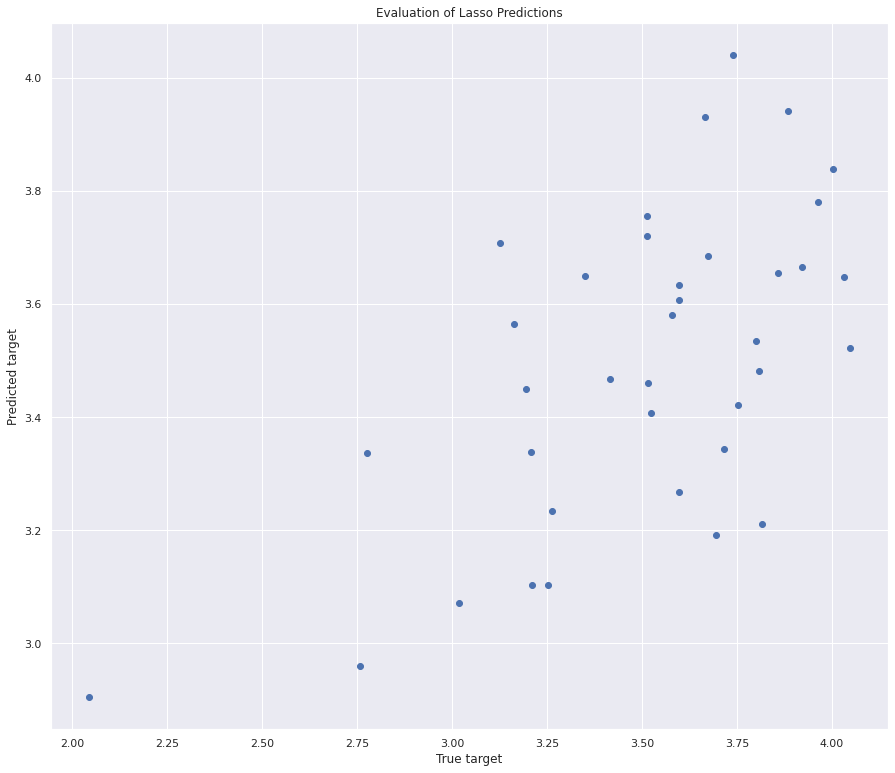

In [160]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, pipe.predict(X_test))
plt.xlabel('True target')
plt.ylabel('Predicted target')
plt.title('Evaluation of Lasso Predictions')

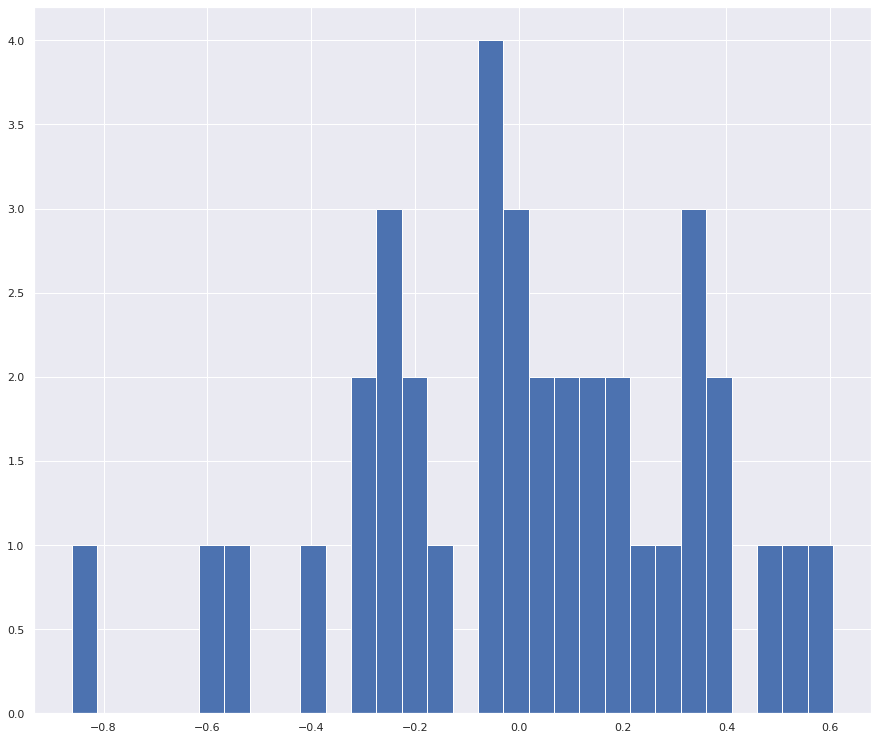

In [161]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(pipe.predict(X_test))

errors = y_test - preds
errors.hist(bins=30)
plt.show()

# Score new data

In [162]:
# load the unseen / new dataset
data = pd.read_csv('ttest.csv')

data[discrete_vars] = data[discrete_vars].astype('category')
y = data['target']
data.drop(columns=['Var2','target'], inplace =True)
print(data.shape)

(42, 7)


In [163]:
new_preds = pipe.predict(data)

In [164]:
y.shape

(42,)

In [165]:
mean_squared_error(y, new_preds)

0.09368832986379728

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Annee   42 non-null     object  
 1   ID      42 non-null     object  
 2   Var1    36 non-null     object  
 3   Var3    39 non-null     float64 
 4   Var4    35 non-null     float64 
 5   Var5    38 non-null     category
 6   Var6    37 non-null     category
dtypes: category(2), float64(2), object(3)
memory usage: 2.1+ KB
